In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [2]:
def get_color_image(img_path,img_number):
    img_data=[]
    for i in range (img_number):
        img = mpimg.imread('../datasets/'+img_path+'/img/' + str(i) + '.png')
        img=cv2.resize(img,(200,200))
        img_data.append(img)
    img_data=np.array(img_data)
    return img_data

In [3]:
def get_cartoon_label(label_path,label_name,label_number):
    label=pd.read_table('../datasets/'+label_path+'/labels.csv')
    label= label[label_name]
    label=label[:label_number]
    label= np.array(label)
    vector2arr = np.mat(label)
    label = vector2arr.A.T
    return label

In [4]:
def train_model(x_train, x_test, y_train, y_test):
    model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200,200,4)),  # convolutional layer 1，convolution kernel 3*3
    layers.MaxPooling2D((2, 2)),  # pooling layer 1，2*2
    layers.Conv2D(64, (3, 3), activation='relu'),  # convolutional layer 2，convolution kernel 3*3
    layers.MaxPooling2D((2, 2)),  # pooling layer 2，2*2
    layers.Conv2D(64, (3, 3), activation='relu'),  # convolutional layer 3，convolution kernel 3*3
    layers.Dropout(.2),


    layers.Flatten(),  # Flatten
    layers.Dense(128, activation='relu'),  # FP layer
    layers.Dropout(.2),
    layers.Dense(64, activation='relu'),  # FP layer
    layers.Dense(10)  # output layer
    ])
    model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
    return model



In [6]:
%%time
#get color image data
img_data=get_color_image('cartoon_set',5000)
#get labels
label=get_cartoon_label('cartoon_set','face_shape',5000)
#train set and validation set
x_train, x_test, y_train, y_test = train_test_split(img_data, label,test_size=0.1,random_state=0)
#model
model=train_model(x_train, x_test, y_train, y_test)
#save model
pickle.dump(model,open("CNN_shape.dat","wb"))  

Epoch 1/10
141/141 [==============================] - 65s 450ms/step - loss: 1.4345 - accuracy: 0.4711 - val_loss: 0.1626 - val_accuracy: 0.9440
Epoch 2/10
141/141 [==============================] - 69s 488ms/step - loss: 0.0863 - accuracy: 0.9753 - val_loss: 0.0167 - val_accuracy: 0.9940
Epoch 3/10
141/141 [==============================] - 68s 483ms/step - loss: 0.0307 - accuracy: 0.9913 - val_loss: 0.0165 - val_accuracy: 0.9940
Epoch 4/10
141/141 [==============================] - 68s 483ms/step - loss: 0.0210 - accuracy: 0.9936 - val_loss: 0.0056 - val_accuracy: 0.9980
Epoch 5/10
141/141 [==============================] - 71s 500ms/step - loss: 0.0103 - accuracy: 0.9967 - val_loss: 0.0080 - val_accuracy: 0.9960
Epoch 6/10
141/141 [==============================] - 67s 478ms/step - loss: 0.0112 - accuracy: 0.9953 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 7/10
141/141 [==============================] - 68s 481ms/step - loss: 0.0077 - accuracy: 0.9976 - val_loss: 5.6828e-04 - va

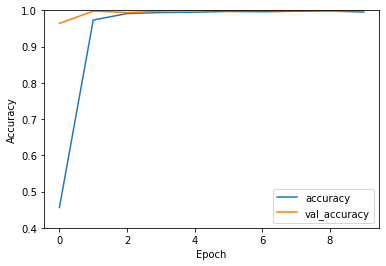

16/16 - 1s - loss: 8.8657e-04 - accuracy: 1.0000 - 1s/epoch - 73ms/step


<Figure size 432x288 with 0 Axes>

In [10]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.4, 1])
plt.legend(loc='lower right')
plt.show()
test_loss, test_acc = model.evaluate(x_test,y_test, verbose=2)
plt.savefig("./B1_accuracy.jpg") 

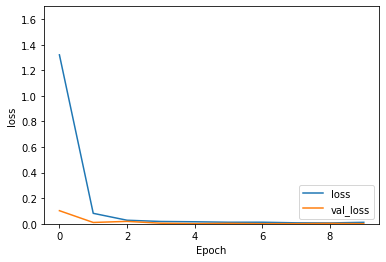

16/16 - 1s - loss: 8.8657e-04 - accuracy: 1.0000 - 1s/epoch - 76ms/step


<Figure size 432x288 with 0 Axes>

In [11]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([0, 1.7])
plt.legend(loc='lower right')
plt.show()
test_loss, test_acc = model.evaluate(x_test,y_test, verbose=2)
plt.savefig("./B1_loss.jpg") 

In [8]:
%%time
img_data_test=get_color_image('cartoon_set_test',2500)
label_test=get_cartoon_label('cartoon_set_test','face_shape',2500)
loaded_model = pickle.load(open("CNN_shape.dat","rb"))
label_pred=loaded_model.evaluate(img_data_test,label_test)

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-01-12 15:11:22         4591
metadata.json                                  2023-01-12 15:11:22           64
variables.h5                                   2023-01-12 15:11:22    208843856
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers\conv2d
......vars
.........0
.........1
...layers\conv2d_1
......vars
.........0
.........1
...layers\conv2d_2
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dropout
......vars
...layers\dropout_1
......vars
...layers\flatten
......vars
...layers\max_pooling2d
......vars
...layers\max_pooling2d_1
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...opt